<a href="https://colab.research.google.com/github/Andro2k/Metodos-Numericos/blob/main/Tarea_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://colab.research.google.com/drive/1omS5e4xV-hPSS7hZ1h1XhzhWRdJO4ooQ?usp=sharing">**Tarea 9**</a>
* **Estudiante:** Jose Luis Andino
* **Materia:** Metodos Numericos
* **Carrera:** Computación
* **Docente:** Jonathan A. Zea

## **Conjunto de Ejercicios**


### **Ejercicio 1.**
Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos. Explique los resultados desde un punto de vista geométrico.
  > $( x_1 + 2x_2 = 0 )$ <br> $( x_1 - x_2 = 0 )$

  > $( x_1 + 2x_2 = 3 )$ <br> $( -2x_1 - 4x_2 = 6 )$

  > $( 2x_1 + x_2 = -1 )$ <br> $( x_1 + x_2 = 2 )$ <br> $( x_1 - 3x_2 = 5 )$

  > $( 2x_1 + x_2 + x_3 = 1 )$ <br> $( 2x_1 + 4x_2 - x_3 = -1 )$

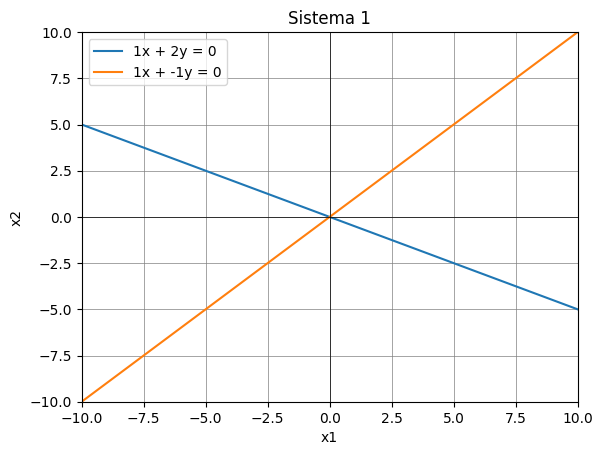

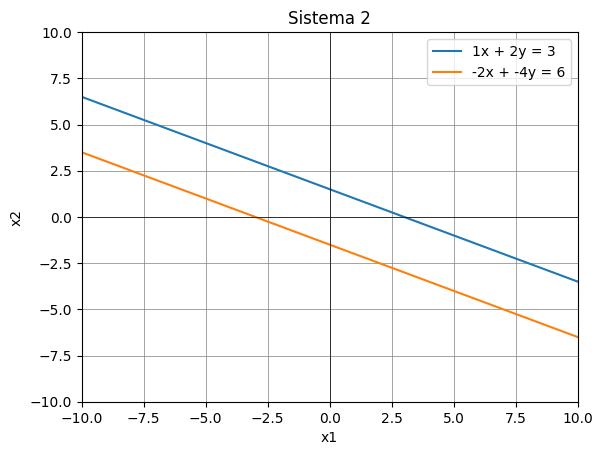

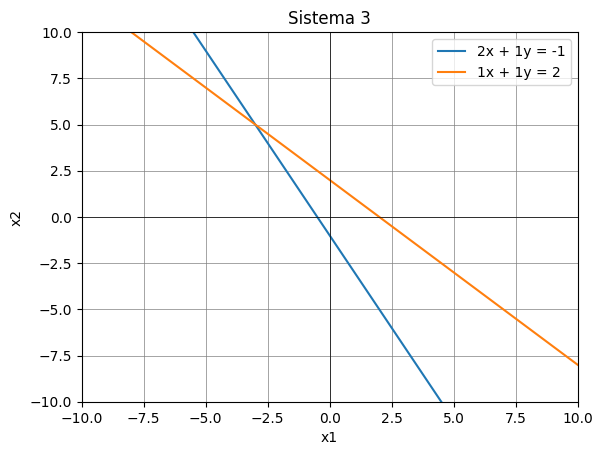

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los sistemas de ecuaciones
sistemas = [
    {'ecuaciones': [(1, 2, 0), (1, -1, 0)], 'titulo': 'Sistema 1'},
    {'ecuaciones': [(1, 2, 3), (-2, -4, 6)], 'titulo': 'Sistema 2'},
    {'ecuaciones': [(2, 1, -1), (1, 1, 2)], 'titulo': 'Sistema 3'}
]

# Definir la función para graficar
def graficar_sistema(ecuaciones, titulo):
    fig, ax = plt.subplots()
    x = np.linspace(-10, 10, 400)

    for coef in ecuaciones:
        a, b, c = coef
        y = (c - a * x) / b
        ax.plot(x, y, label=f'{a}x + {b}y = {c}')

    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    ax.grid(color='gray', linestyle='-', linewidth=0.5)
    ax.legend()
    plt.title(titulo)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()

# Graficar cada sistema
for sistema in sistemas:
    graficar_sistema(sistema['ecuaciones'], sistema['titulo'])


> *Para el cuarto sistema de tres variables, vamos a utilizar el método de eliminación gaussiana para encontrar la solución e interpretar los resultados geométricos.*

In [24]:
def eliminacion_gaussiana_3x3(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)

    n = A.shape[0]

    # Construir la matriz aumentada
    Ab = np.hstack([A, b.reshape(-1, 1)])

    # Eliminación Gaussiana
    for i in range(n):
        # Buscar el pivote y intercambiar filas
        max_row = i + np.argmax(np.abs(Ab[i:, i]))
        if i != max_row:
            Ab[[i, max_row]] = Ab[[max_row, i]]

        # Eliminar las entradas por debajo del pivote
        for j in range(i + 1, n):
            factor = Ab[j, i] / Ab[i, i]
            Ab[j, i:] -= factor * Ab[i, i:]

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (Ab[i, -1] - np.dot(Ab[i, i + 1:n], x[i + 1:n])) / Ab[i, i]

    return x

# Definición del sistema
A4 = np.array([[2, 1, 1],
               [2, 4, -1],
               [1, 1, 0]])
b4 = np.array([1, -1, 2])

# Resolver el sistema
x4 = eliminacion_gaussiana_3x3(A4, b4)

print(f"Solución para el sistema 4: x1 = {x4[0]}, x2 = {x4[1]}, x3 = {x4[2]}")


Solución para el sistema 4: x1 = 9.999999999999998, x2 = -7.999999999999999, x3 = -10.999999999999998


### **Ejercicio 2.**
Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver los siguientes sistemas lineales. No reordene las ecuaciones. (La solución exacta para cada sistema es $( x_1 = -1 )$, $( x_2 = 2 )$, $( x_3 = 3 )$.)

   > $(-x_1 + 4x_2 + x_3 = 8)$ <br> $(\frac{5}{3} x_1 + \frac{2}{3} x_2 + \frac{2}{3} x_3 = 1)$ <br> $(2x_1 + x_2 + 4x_3 = 11)$

   > $(4x_1 + 2x_2 - x_3 = -5)$ <br> $(\frac{1}{9} x_1 + \frac{1}{9} x_2 - \frac{1}{3} x_3 = -1)$ <br> $(x_1 + 4x_2 + 2x_3 = 9)$


In [25]:
import numpy as np

def eliminacion_gaussiana(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)

    n = A.shape[0]

    # Construir la matriz aumentada
    Ab = np.hstack([A, b.reshape(-1, 1)])

    # Eliminación Gaussiana
    for i in range(n):
        # Buscar el pivote y intercambiar filas
        max_row = i + np.argmax(np.abs(Ab[i:, i]))
        if i != max_row:
            Ab[[i, max_row]] = Ab[[max_row, i]]

        # Eliminar las entradas por debajo del pivote
        for j in range(i + 1, n):
            factor = Ab[j, i] / Ab[i, i]
            Ab[j, i:] -= factor * Ab[i, i:]
            # Redondear a dos dígitos
            Ab[j] = np.round(Ab[j], 2)

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (Ab[i, -1] - np.dot(Ab[i, i + 1:n], x[i + 1:n])) / Ab[i, i]
        # Redondear a dos dígitos
        x[i] = round(x[i], 2)

    return x

# Definición de los sistemas
A1 = np.array([[-1, 4, 1],
               [5/3, 2/3, 2/3],
               [2, 1, 4]])
b1 = np.array([8, 1, 11])

A2 = np.array([[4, 2, -1],
               [1/9, 1/9, -1/3],
               [1, 4, 2]])
b2 = np.array([-5, -1, 9])

# Resolver los sistemas
x1 = eliminacion_gaussiana(A1, b1)
x2 = eliminacion_gaussiana(A2, b2)

print(f"Solución para el sistema 2a: x1 = {x1[0]}, x2 = {x1[1]}, x3 = {x1[2]}")
print(f"Solución para el sistema 2b: x1 = {x2[0]}, x2 = {x2[1]}, x3 = {x2[2]}")


Solución para el sistema 2a: x1 = -0.99, x2 = 1.01, x3 = 2.99
Solución para el sistema 2b: x1 = -1.02, x2 = 1.02, x3 = 2.97


### **Ejercicio 3.**
Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y determine si se necesitan intercambios de fila:
> $( x_1 - x_2 + 3x_3 = 2 )$ <br> $( 3x_1 - 3x_2 + x_3 = -1 )$ <br> $( x_1 + x_2 = 3 )$

> $( 2x_1 - 1.5x_2 + 3x_3 = 1 )$ <br> $( -x_1 + 2x_3 = 3 )$ <br> $( 4x_1 - 4.5x_2 + 5x_3 = 1 )$

> $( 2x_1 = 3 )$ <br> $( x_1 + 1.5x_2 = 4.5 )$ <br> $( -3x_2 + 0.5x_3 = -6.6 )$

> $( x_1 + x_2 + x_4 = 2 )$ <br> $( 2x_1 + x_2 - x_3 + x_4 = 1 )$ <br> $( 4x_1 - x_2 - 2x_3 + 2x_4 = 0 )$ <br> $( 3x_1 - x_2 - x_3 + 2x_4 = -3 )$



In [26]:
import numpy as np

def eliminacion_gaussiana(A: np.ndarray, b: np.ndarray) -> np.ndarray:

    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)

    n = A.shape[0]

    # Construir la matriz aumentada
    Ab = np.hstack([A, b.reshape(-1, 1)])
    print(f"Inicialmente:\n{Ab}\n")

    # Eliminación Gaussiana con pivoteo parcial
    for i in range(n):
        # Buscar el pivote y intercambiar filas si es necesario
        max_row = i + np.argmax(np.abs(Ab[i:, i]))
        if i != max_row:
            Ab[[i, max_row]] = Ab[[max_row, i]]
            print(f"Intercambio de filas {i} y {max_row}:\n{Ab}\n")

        # Eliminar las entradas por debajo del pivote
        for j in range(i + 1, n):
            factor = Ab[j, i] / Ab[i, i]
            Ab[j, i:] -= factor * Ab[i, i:]
            print(f"Eliminando fila {j} usando fila {i}:\n{Ab}\n")

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (Ab[i, -1] - np.dot(Ab[i, i + 1:n], x[i + 1:n])) / Ab[i, i]

    return x

# Definición de sistemas de ecuaciones
sistemas = {
    'a': {
        'A': np.array([[1, 3, -2],
                       [3, 5, 6],
                       [2, 4, 3]]),
        'b': np.array([5, 7, 8])
    },
    'b': {
        'A': np.array([[2, -1, 0],
                       [1, 6, -2],
                       [1, 4, 8]]),
        'b': np.array([1, 2, 3])
    },
    'c': {
        'A': np.array([[3, -1, 2],
                       [6, -1, 0],
                       [-3, 3, 1]]),
        'b': np.array([1, 0, 4])
    },
    'd': {
        'A': np.array([[1, -1, 2],
                       [0, 3, 1],
                       [2, 4, -1]]),
        'b': np.array([2, 1, 3])
    }
}

# Resolver los sistemas y mostrar resultados
for key, system in sistemas.items():
    print(f"Resolviendo sistema {key}:")
    A = system['A']
    b = system['b']
    solucion = eliminacion_gaussiana(A, b)
    print(f"Solución del sistema {key}: {solucion}\n")


Resolviendo sistema a:
Inicialmente:
[[ 1.  3. -2.  5.]
 [ 3.  5.  6.  7.]
 [ 2.  4.  3.  8.]]

Intercambio de filas 0 y 1:
[[ 3.  5.  6.  7.]
 [ 1.  3. -2.  5.]
 [ 2.  4.  3.  8.]]

Eliminando fila 1 usando fila 0:
[[ 3.          5.          6.          7.        ]
 [ 0.          1.33333333 -4.          2.66666667]
 [ 2.          4.          3.          8.        ]]

Eliminando fila 2 usando fila 0:
[[ 3.          5.          6.          7.        ]
 [ 0.          1.33333333 -4.          2.66666667]
 [ 0.          0.66666667 -1.          3.33333333]]

Eliminando fila 2 usando fila 1:
[[ 3.00000000e+00  5.00000000e+00  6.00000000e+00  7.00000000e+00]
 [ 0.00000000e+00  1.33333333e+00 -4.00000000e+00  2.66666667e+00]
 [ 0.00000000e+00  1.11022302e-16  1.00000000e+00  2.00000000e+00]]

Solución del sistema a: [-15.   8.   2.]

Resolviendo sistema b:
Inicialmente:
[[ 2. -1.  0.  1.]
 [ 1.  6. -2.  2.]
 [ 1.  4.  8.  3.]]

Eliminando fila 1 usando fila 0:
[[ 2.  -1.   0.   1. ]
 [ 0.   6.5

### **Ejercicio 4.**
Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los siguientes sistemas lineales.
   > $(\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 = 9)$ <br> $(\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 = 8)$ <br> $(\frac{1}{2}x_1 + x_2 + 2x_3 = 8)$

   > $(3.333x_1 + 15920x_2 - 10.333x_3 = 15913)$ <br> $(2.222x_1 + 16.71x_2 + 9.612x_3 = 28.544)$ <br> $(1.5611x_1 + 5.1791x_2 + 1.6852x_3 = 8.4254)$

   > $( x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 + \frac{1}{4}x_4 = \frac{1}{6} )$ <br> $(\frac{1}{2}x_1 + \frac{1}{3}x_2 + \frac{1}{4}x_3 + \frac{1}{5}x_4 = \frac{1}{7})$ <br> $(\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 + \frac{1}{6}x_4 = \frac{1}{8})$ <br> $(\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 + \frac{1}{7}x_4 = \frac{1}{9})$

   > $( 2x_1 + x_2 - x_3 + x_4 - 3x_5 = 7 )$ <br> $( x_1 + 2x_3 - x_4 + x_5 = 2 )$ <br> $( -2x_2 - x_3 + x_4 - x_5 = -5 )$ <br> $( 3x_1 + x_2 - 4x_3 + 5x_5 = 6 )$ <br> $( x_1 - x_2 - x_3 - x_4 + x_5 = -3 )$

In [27]:
import numpy as np

def eliminacion_gaussiana_32bit(A: np.ndarray, b: np.ndarray) -> np.ndarray:

    A = np.array(A, dtype=np.float32)
    b = np.array(b, dtype=np.float32)

    n = A.shape[0]

    # Construir la matriz aumentada
    Ab = np.hstack([A, b.reshape(-1, 1)])
    print(f"Inicialmente:\n{Ab}\n")

    # Eliminación Gaussiana con pivoteo parcial
    for i in range(n):
        # Buscar el pivote y intercambiar filas si es necesario
        max_row = i + np.argmax(np.abs(Ab[i:, i]))
        if i != max_row:
            Ab[[i, max_row]] = Ab[[max_row, i]]
            print(f"Intercambio de filas {i} y {max_row}:\n{Ab}\n")

        # Eliminar las entradas por debajo del pivote
        for j in range(i + 1, n):
            factor = Ab[j, i] / Ab[i, i]
            Ab[j, i:] -= factor * Ab[i, i:]
            print(f"Eliminando fila {j} usando fila {i}:\n{Ab}\n")

    # Sustitución hacia atrás
    x = np.zeros(n, dtype=np.float32)
    for i in range(n - 1, -1, -1):
        x[i] = (Ab[i, -1] - np.dot(Ab[i, i + 1:n], x[i + 1:n])) / Ab[i, i]

    return x

# Definición de sistemas de ecuaciones

sistemas = {
    'a': {
        'A': np.array([[1/4, 1/5, 1/6],
                       [1/3, 1/4, 1/5],
                       [1/2, 1, 2]], dtype=np.float32),
        'b': np.array([9, 8, 8], dtype=np.float32)
    },
    'b': {
        'A': np.array([[3.333, 15920, -10.333],
                       [2.222, 16.71, 9.612],
                       [1.5611, 5.1791, 1.6852]], dtype=np.float32),
        'b': np.array([15913, 28.544, 8.4254], dtype=np.float32)
    },
    'c': {
        'A': np.array([[1, 1/2, 1/3, 1/4],
                       [1/2, 1/3, 1/4, 1/5],
                       [1/3, 1/4, 1/5, 1/6],
                       [1/4, 1/5, 1/6, 1/7]], dtype=np.float32),
        'b': np.array([1/6, 1/7, 1/8, 1/9], dtype=np.float32)
    },
    'd': {
        'A': np.array([[2, 1, -1, 1, -3],
                       [1, 0, 2, -1, 1],
                       [0, -2, -1, 1, -1],
                       [3, 1, -4, 0, 5],
                       [1, -1, -1, -1, 1]], dtype=np.float32),
        'b': np.array([7, 2, -5, 6, -3], dtype=np.float32)
    }
}

# Resolver los sistemas y mostrar resultados
for key, system in sistemas.items():
    print(f"Resolviendo sistema {key}:")
    A = system['A']
    b = system['b']
    solucion = eliminacion_gaussiana_32bit(A, b)
    print(f"Solución del sistema {key}: {solucion}\n")


Resolviendo sistema a:
Inicialmente:
[[0.25       0.2        0.16666667 9.        ]
 [0.33333334 0.25       0.2        8.        ]
 [0.5        1.         2.         8.        ]]

Intercambio de filas 0 y 2:
[[0.5        1.         2.         8.        ]
 [0.33333334 0.25       0.2        8.        ]
 [0.25       0.2        0.16666667 9.        ]]

Eliminando fila 1 usando fila 0:
[[ 0.5         1.          2.          8.        ]
 [ 0.         -0.4166667  -1.1333333   2.6666665 ]
 [ 0.25        0.2         0.16666667  9.        ]]

Eliminando fila 2 usando fila 0:
[[ 0.5        1.         2.         8.       ]
 [ 0.        -0.4166667 -1.1333333  2.6666665]
 [ 0.        -0.3       -0.8333333  5.       ]]

Eliminando fila 2 usando fila 1:
[[ 0.5         1.          2.          8.        ]
 [ 0.         -0.4166667  -1.1333333   2.6666665 ]
 [ 0.          0.         -0.01733333  3.0800002 ]]

Solución del sistema a: [-227.07697  476.92322 -177.69237]

Resolviendo sistema b:
Inicialmente:


### **Ejercicio 5.**
Dado el sistema lineal:
   > $( x_1 - x_2 + \alpha x_3 = -2 )$ <br> $( -x_1 + 2x_2 - \alpha x_3 = 3 )$ <br> $( \alpha x_1 + x_2 + x_3 = 2 )$ |

* **a.** Encuentre el valor(es) de $(\alpha)$ para los que el sistema no tiene soluciones.
* **b.** Encuentre el valor(es) de $(\alpha)$ para los que el sistema tiene un número infinito de soluciones.
* **c.** Suponga que existe una única solución para una $(\alpha)$ determinada, encuentre la solución.


a. **Encuentre el valor(es) de $(\alpha)$ para los que el sistema no tiene soluciones.**

Para que el sistema no tenga soluciones, la matriz de coeficientes debe ser singular (su determinante debe ser cero) y el sistema debe ser inconsistente.

Primero, construimos la matriz de coeficientes $(A)$ y el vector de términos independientes $(\mathbf{b})$:

$[
A = \begin{pmatrix}
1 & -1 & \alpha \\
-1 & 2 & -\alpha \\
\alpha & 1 & 1
\end{pmatrix}, \quad \mathbf{b} = \begin{pmatrix}
-2 \\
3 \\
2
\end{pmatrix}
]$

Calculamos el determinante de $(A)$:
$[
\text{det}(A) = \begin{vmatrix}
1 & -1 & \alpha \\
-1 & 2 & -\alpha \\
\alpha & 1 & 1
\end{vmatrix}
]$

Expandiendo por la primera fila, tenemos:

$[
\text{det}(A) = 1 \cdot \begin{vmatrix}
2 & -\alpha \\
1 & 1
\end{vmatrix} - (-1) \cdot \begin{vmatrix}
-1 & -\alpha \\
\alpha & 1
\end{vmatrix} + \alpha \cdot \begin{vmatrix}
-1 & 2 \\
\alpha & 1
\end{vmatrix}
]$

$[
\text{det}(A) = 1 \cdot (2 \cdot 1 - (-\alpha) \cdot 1) + 1 \cdot ((-1) \cdot 1 - (-\alpha) \cdot \alpha) + \alpha \cdot ((-1) \cdot 1 - 2 \cdot \alpha)
]$

$[
\text{det}(A) = 1 \cdot (2 + \alpha) + 1 \cdot (-1 + \alpha^2) + \alpha \cdot (-1 - 2\alpha)
]$

$[
\text{det}(A) = 2 + \alpha - 1 + \alpha^2 - \alpha - 2\alpha^2
]$

$[
\text{det}(A) = \alpha^2 - 2\alpha^2 + 2 - 1
]$

$[
\text{det}(A) = -\alpha^2 + 1
]$

$[
\text{det}(A) = 1 - \alpha^2
]$

Para que la matriz sea singular (determinante igual a cero):

$[
1 - \alpha^2 = 0
]$

$[
\alpha^2 = 1
]$

$[
\alpha = \pm 1
]$

Entonces, los valores de $(\alpha)$ para los que el sistema no tiene soluciones son $(\alpha = 1)$ y $(\alpha = -1)$.

b. **Encuentre el valor(es) de $(\alpha)$ para los que el sistema tiene un número infinito de soluciones.**

Para que el sistema tenga un número infinito de soluciones, debe ser consistente y la matriz de coeficientes debe ser singular. Ya determinamos que la matriz es singular cuando $(\alpha = 1)$ o $(\alpha = -1)$. Verificamos la consistencia de cada caso sustituyendo $(\alpha)$ en el sistema original.

Para $(\alpha = 1)$:

$[
\begin{cases}
x_1 - x_2 + x_3 = -2 \\
-x_1 + 2 x_2 - x_3 = 3 \\
x_1 + x_2 + x_3 = 2 \\
\end{cases}
]$

Para $(\alpha = -1)$:

$[
\begin{cases}
x_1 - x_2 - x_3 = -2 \\
-x_1 + 2 x_2 + x_3 = 3 \\
-x_1 + x_2 + x_3 = 2 \\
\end{cases}
]$

Verificamos la consistencia de ambos casos:

**Para $(\alpha = 1)$:**

Usamos el método de eliminación de Gauss para verificar la consistencia.

$[
\begin{pmatrix}
1 & -1 & 1 & | & -2 \\
-1 & 2 & -1 & | & 3 \\
1 & 1 & 1 & | & 2 \\
\end{pmatrix}
]$

Realizando operaciones elementales:

1. Multiplicamos la primera fila por -1 y la sumamos a la segunda fila:

$[
\begin{pmatrix}
1 & -1 & 1 & | & -2 \\
0 & 1 & 0 & | & 1 \\
1 & 1 & 1 & | & 2 \\
\end{pmatrix}
]$

2. Multiplicamos la primera fila por -1 y la sumamos a la tercera fila:

$[
\begin{pmatrix}
1 & -1 & 1 & | & -2 \\
0 & 1 & 0 & | & 1 \\
0 & 2 & 0 & | & 4 \\
\end{pmatrix}
]$

3. Restamos 2 veces la segunda fila de la tercera fila:

$[
\begin{pmatrix}
1 & -1 & 1 & | & -2 \\
0 & 1 & 0 & | & 1 \\
0 & 0 & 0 & | & 2 \\
\end{pmatrix}
]$

La última fila da una inconsistencia $(0 = 2)$, por lo que el sistema es inconsistente y no tiene solución para $(\alpha = 1)$.

**Para $(\alpha = -1)$:**

Usamos el método de eliminación de Gauss para verificar la consistencia.

$[
\begin{pmatrix}
1 & -1 & -1 & | & -2 \\
-1 & 2 & 1 & | & 3 \\
-1 & 1 & 1 & | & 2 \\
\end{pmatrix}
]$

Realizando operaciones elementales:

1. Multiplicamos la primera fila por -1 y la sumamos a la segunda fila:

$[
\begin{pmatrix}
1 & -1 & -1 & | & -2 \\
0 & 1 & 0 & | & 1 \\
-1 & 1 & 1 & | & 2 \\
\end{pmatrix}
]$

2. Multiplicamos la primera fila por -1 y la sumamos a la tercera fila:

$[
\begin{pmatrix}
1 & -1 & -1 & | & -2 \\
0 & 1 & 0 & | & 1 \\
0 & 0 & 0 & | & 0 \\
\end{pmatrix}
]$

La última fila da una consistencia $(0 = 0)$, por lo que el sistema tiene un número infinito de soluciones para $(\alpha = -1)$.

c. **Suponga que existe una única solución para una $(\alpha)$ determinada, encuentre la solución.**

Para que el sistema tenga una única solución, el determinante de la matriz de coeficientes debe ser diferente de cero. Esto ocurre cuando $(\alpha \neq \pm 1)$.

Consideremos $(\alpha = 0)$ (un valor válido para $(\alpha)$):

$[
\begin{cases}
x_1 - x_2 = -2 \\
-x_1 + 2 x_2 = 3 \\
x_2 + x_3 = 2 \\
\end{cases}
]$

Resolvemos este sistema:

De la primera ecuación:

$[
x_1 - x_2 = -2 \quad \Rightarrow \quad x_1 = x_2 - 2
]$

Sustituimos en la segunda ecuación:

$[
-(x_2 - 2) + 2 x_2 = 3 \quad \Rightarrow \quad -x_2 + 2 + 2 x_2 = 3 \quad \Rightarrow \quad x_2 + 2 = 3 \quad \Rightarrow \quad x_2 = 1
]$

Sustituimos $(x_2)$ en la expresión de $(x_1)$:

$[
x_1 = 1 - 2 \quad \Rightarrow \quad x_1 = -1
]$

Sustituimos $(x_2)$ en la tercera ecuación:

$[
1 + x_3 = 2 \quad \Rightarrow \quad x_3 = 1
]$

Por lo tanto, la solución es:

$[
(x_1, x_2, x_3) = (-1, 1, 1)
]$

## **Ejercicios Aplicados**

### **Ejercicio 6.**
Suponga que en un sistema biológico existen n especies de animales y m fuentes de alimento. Si $(x_j)$ representa la población de las j-ésimas especies, para cada $(j = 1, \cdots, n)$; $(b_i)$ representa el suministro diario disponible del i-ésimo alimento y $(a_{ij})$ representa la cantidad del i-ésimo alimento.

$
a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n = b_1 $<br>$
a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n = b_2 $<br>$
\vdots$<br>$
a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n = b_m
$

representa un equilibrio donde existe un suministro diario de alimento para cumplir con precisión con el promedio diario de consumo de cada especie.

> **a.** Si
$(A = [a_{ij}] = \begin{bmatrix}1 & 2 & 0 & 3 \\1 & 0 & 2 & 2\\0 & 0 & 1 & 1\end{bmatrix}$

$(x = (x_j) = [1000, 500, 350, 400])$, y $(b = (b_i) = [3500, 2700, 900])$.
* ¿Existe suficiente alimento para satisfacer el consumo promedio diario?

> **b.** ¿Cuál es el número máximo de animales de cada especie que se podría agregar de forma individual al sistema con el suministro de alimento que cumpla con el consumo?

> **c.** Si hay una perturbación en el sistema y el suministro diario de uno de los alimentos cambia en un 10% y otro en un 5%, ¿cómo afecta esto a las poblaciones de las especies?

In [29]:
import numpy as np

# Parte a
A = np.array([[1, 2, 0, 3],
              [1, 0, 2, 2],
              [0, 0, 1, 1]])
x = np.array([1000, 500, 350, 400])
b = np.array([3500, 2700, 900])
Ax = np.dot(A, x)
suficiente_alimento = np.allclose(Ax, b)
print(f"¿Existe suficiente alimento para satisfacer el consumo promedio diario? {suficiente_alimento}")

# Parte b
suministro_restante = b - Ax
max_animales_adicionales = np.zeros(len(x))

for i in range(len(x)):
    e_i = np.zeros(len(x))
    e_i[i] = 1
    A_e_i = np.dot(A, e_i)
    # Evitamos la división por cero
    if np.any(A_e_i == 0):
        max_animales_adicionales[i] = np.inf
    else:
        max_animales_adicionales[i] = np.min(suministro_restante / A_e_i)

print(f"El número máximo de animales de cada especie que se puede agregar es: {max_animales_adicionales}")

# Parte c
cambios = np.array([0.1, 0.05, 0])  # Cambios en el suministro de los alimentos
b_nuevo = b * (1 + cambios)[:len(b)]  # Aseguramos que b_nuevo tenga la misma longitud que b

# Comprobamos si el sistema es resoluble
if A.shape[0] == len(b_nuevo):
    try:
        x_nuevo = np.linalg.solve(A, b_nuevo)
        print(f"Las nuevas poblaciones de las especies son: {x_nuevo}")
    except np.linalg.LinAlgError as e:
        print(f"Error al resolver el sistema: {e}")
else:
    print("El sistema de ecuaciones no es resoluble con la matriz actual.")


¿Existe suficiente alimento para satisfacer el consumo promedio diario? False
El número máximo de animales de cada especie que se puede agregar es: [ inf  inf  inf 100.]
Error al resolver el sistema: Last 2 dimensions of the array must be square
